# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
count_one = 1
set_one = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


all_data = []

print('Beginning Data Retrieval \n-----------------------------------') 

for c in cities:

   # Build query URL

     query_url = f"{url}appid={weather_api_key}&units={units}&q=" + cities[1]   

    
     try:
       print(f'Processing Record {count_one} of Set {set_one} | {city}')
       query_url = f"{url}appid={weather_api_key}&units={units}&q=" + c    
       response = requests.get(query_url).json()
       city = c
       lat = response["coord"]['lat']
       lon = response["coord"]['lon']
       temp_max = response["main"]['temp_max']
       Humidity = response["main"]['humidity']
       Cloudiness = response["clouds"]['all']
       Wind_Speed = response["wind"]['speed']
       Country = response["sys"]['country']
       Date = response["dt"]
       #print(city, lat, lon, temp, Humidity, Cloudiness,Wind_Speed,Country, Date)
       all_data.append({"City":city, "Lat": lat, "Lng": lon, "Max Temp": temp_max, "Humidity":Humidity,\
                        "Cloudiness":Cloudiness , "Wind Speed": Wind_Speed ,"Country": Country, "Date": Date})
       count_one += 1

     except:
        print("City not found. Skipping...")
        
     if count_one == 50:
        set_one += 1
        count_one = 1
        time.sleep(10)
print('-----------------------------------\nData Retrival Complete\n-----------------------------------') 

Beginning Data Retrieval 
-----------------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | buckie
Processing Record 3 of Set 1 | coahuayana de hidalgo
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | sinabang
Processing Record 6 of Set 1 | tazacorte
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | rikaze
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 12 of Set 1 | taiohae
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | sao vicente
Processing Record 19 of Set 1 | medvezh'yegorsk
Processing Record 20 of Set 1 | longyearbyen
Pro

Processing Record 31 of Set 4 | belyy yar
Processing Record 32 of Set 4 | san jose de jachal
Processing Record 33 of Set 4 | island harbour
Processing Record 34 of Set 4 | praya
Processing Record 35 of Set 4 | as samawah
Processing Record 36 of Set 4 | ghat
Processing Record 37 of Set 4 | isafjordur
Processing Record 38 of Set 4 | hirado
Processing Record 39 of Set 4 | faya-largeau
Processing Record 40 of Set 4 | kindu
Processing Record 41 of Set 4 | hammerfest
Processing Record 42 of Set 4 | shush
Processing Record 43 of Set 4 | mamfe
Processing Record 44 of Set 4 | makokou
Processing Record 45 of Set 4 | taitung city
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | recreo
Processing Record 49 of Set 4 | porteirinha
Processing Record 1 of Set 5 | loiza
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | afaahiti
Processing Record 4 of Set 5 | ghanzi
Processing Record 5 of Set 5 | enewetak
Processing R

Processing Record 21 of Set 8 | aioun
Processing Record 22 of Set 8 | hasaki
Processing Record 23 of Set 8 | lyuban'
Processing Record 24 of Set 8 | lib
Processing Record 25 of Set 8 | san jose
Processing Record 26 of Set 8 | sao joao da barra
Processing Record 27 of Set 8 | miranda
City not found. Skipping...
Processing Record 27 of Set 8 | saint saviour
Processing Record 28 of Set 8 | pimentel
Processing Record 29 of Set 8 | agar
Processing Record 30 of Set 8 | fale old settlement
Processing Record 31 of Set 8 | pirallahi
Processing Record 32 of Set 8 | varkaus
Processing Record 33 of Set 8 | hotan
Processing Record 34 of Set 8 | bodo
Processing Record 35 of Set 8 | bandar abbas
Processing Record 36 of Set 8 | skien
City not found. Skipping...
Processing Record 36 of Set 8 | qasr-e qand
Processing Record 37 of Set 8 | san rafael del sur
Processing Record 38 of Set 8 | isla del bosque
Processing Record 39 of Set 8 | jacksonville
Processing Record 40 of Set 8 | hancheng
Processing Reco

Processing Record 7 of Set 12 | mukalla
Processing Record 8 of Set 12 | fortuna
Processing Record 9 of Set 12 | kapuskasing
Processing Record 10 of Set 12 | curitibanos
Processing Record 11 of Set 12 | peniche
Processing Record 12 of Set 12 | lospalos
City not found. Skipping...
Processing Record 12 of Set 12 | vredenburg
Processing Record 13 of Set 12 | kalmunai
Processing Record 14 of Set 12 | nouadhibou
Processing Record 15 of Set 12 | flin flon
Processing Record 16 of Set 12 | las tablas
-----------------------------------
Data Retrival Complete
-----------------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame


weather_data_df = pd.DataFrame(all_data) 

# Show Record Count
weather_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buckie,57.6757,-2.9624,31.71,76,8,5.10,GB,1699571046
1,coahuayana de hidalgo,18.7000,-103.6583,85.03,71,85,4.41,MX,1699571046
2,west island,-12.1568,96.8225,78.78,89,75,14.97,CC,1699571047
3,sinabang,2.4803,96.3801,78.12,85,99,3.60,ID,1699571047
4,tazacorte,28.6290,-17.9293,70.77,70,100,18.99,ES,1699571047


In [6]:
# Export the City_Data into a csv
weather_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
weather_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buckie,57.6757,-2.9624,31.71,76,8,5.10,GB,1699571046
1,coahuayana de hidalgo,18.7000,-103.6583,85.03,71,85,4.41,MX,1699571046
2,west island,-12.1568,96.8225,78.78,89,75,14.97,CC,1699571047
3,sinabang,2.4803,96.3801,78.12,85,99,3.60,ID,1699571047
4,tazacorte,28.6290,-17.9293,70.77,70,100,18.99,ES,1699571047


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

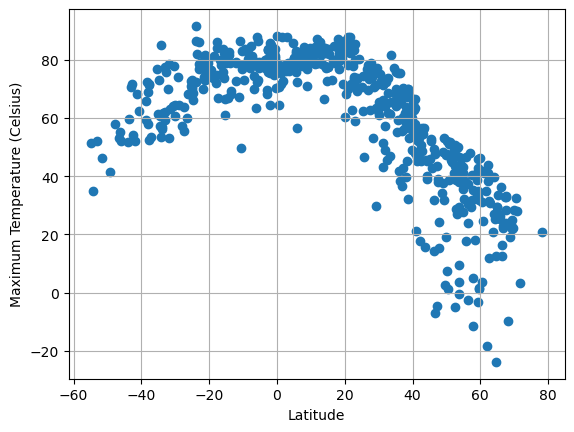

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
# plt.title("Temperature in World Cities")
plt.ylabel("Maximum Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

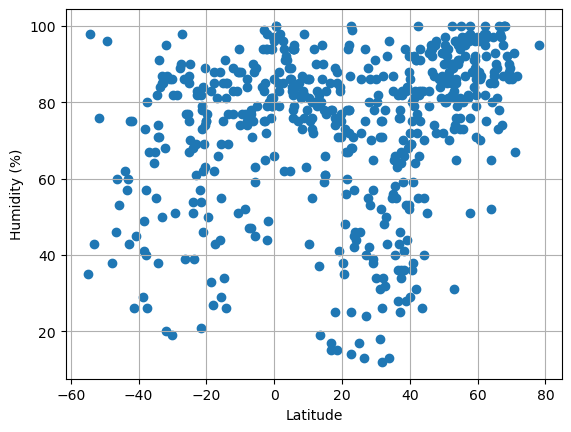

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

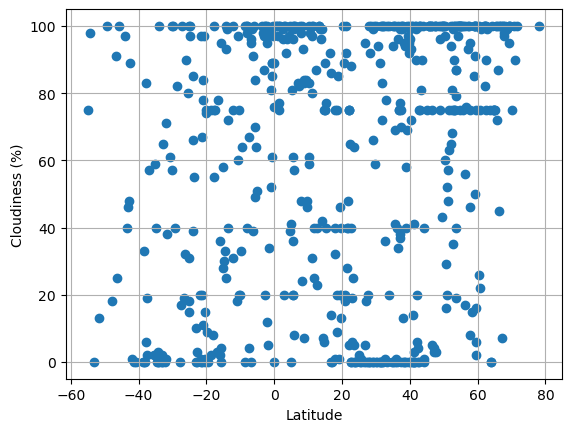

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

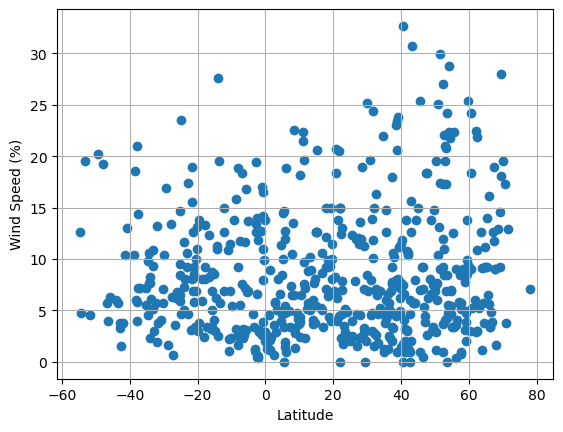

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern = weather_data_df.loc[weather_data_df["Lat"] >= 0]
northern["Hemisphere"] = "Northern Hemisphere"
northern_hemi_df = northern.set_index("Hemisphere")
# Display sample data
northern_hemi_df.head()

/var/folders/zt/x756b70j3v75355fl48s3dzc0000gn/T/ipykernel_2681/2271965462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern["Hemisphere"] = "Northern Hemisphere"


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Hemisphere,,,,,,,,,
Northern Hemisphere,buckie,57.6757,-2.9624,31.71,76,8,5.10,GB,1699571046
Northern Hemisphere,coahuayana de hidalgo,18.7000,-103.6583,85.03,71,85,4.41,MX,1699571046
Northern Hemisphere,sinabang,2.4803,96.3801,78.12,85,99,3.60,ID,1699571047
Northern Hemisphere,tazacorte,28.6290,-17.9293,70.77,70,100,18.99,ES,1699571047
Northern Hemisphere,wailua homesteads,22.0669,-159.3780,82.83,78,75,14.97,US,1699571048


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern = weather_data_df.loc[weather_data_df["Lat"] < 0]
southern["Hemisphere"] = "Southern Hemisphere"
southern_hemi_df = southern.set_index("Hemisphere")
# Display sample data
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

/var/folders/zt/x756b70j3v75355fl48s3dzc0000gn/T/ipykernel_2681/4081705702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern["Hemisphere"] = "Southern Hemisphere"


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Hemisphere,,,,,,,,,
Southern Hemisphere,west island,-12.1568,96.8225,78.78,89,75,14.97,CC,1699571047
Southern Hemisphere,margaret river,-33.9500,115.0667,56.89,71,100,7.67,AU,1699571047
Southern Hemisphere,ushuaia,-54.8000,-68.3000,51.46,35,75,12.66,AR,1699571048
Southern Hemisphere,hithadhoo,-0.6000,73.0833,80.58,79,89,7.99,MV,1699571048
Southern Hemisphere,grytviken,-54.2811,-36.5092,35.02,98,98,4.74,GS,1699571049


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7027331588266867


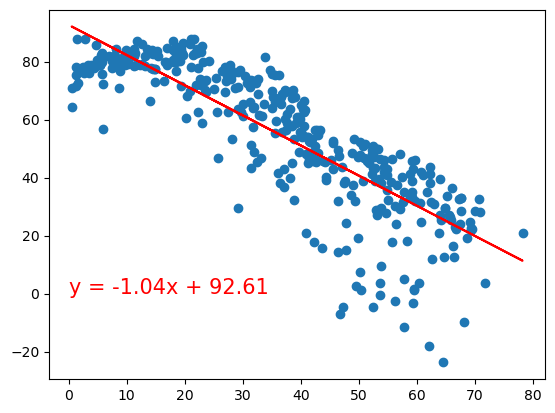

In [46]:
# Linear regression on Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.show()

The r-value is: 0.4722553177944377


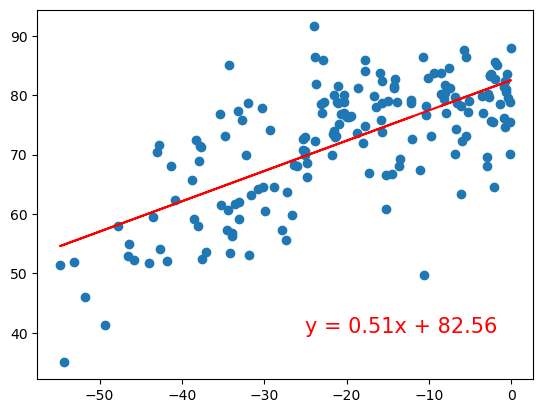

In [48]:
# Linear regression on Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -25, 40)
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature. There is a weak positive correlation between latitude and maximum temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04033711654358871


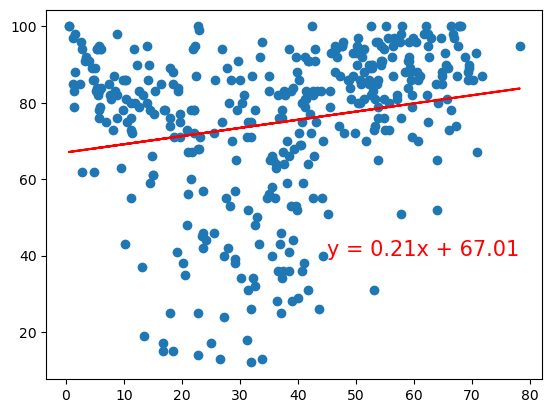

In [49]:
# Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 45, 40)
plt.show()

The r-value is: 0.09948326343618277


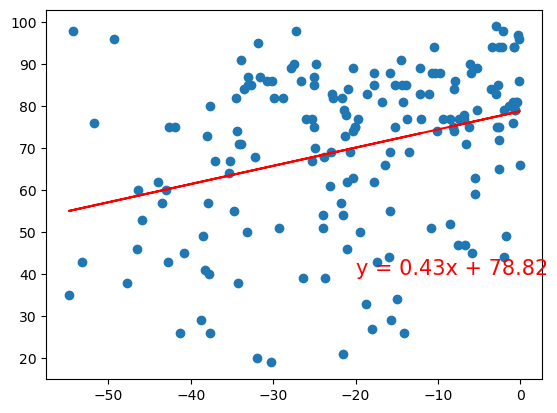

In [50]:
# Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -20, 40)
plt.show()


**Discussion about the linear relationship:** There is a very weak correlation between latitude and humidity for both northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.025294567944627182


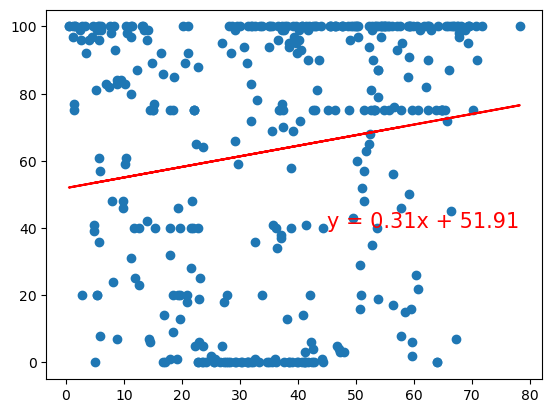

In [51]:
# Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 45, 40)
plt.show()

The r-value is: 0.09643835026479772


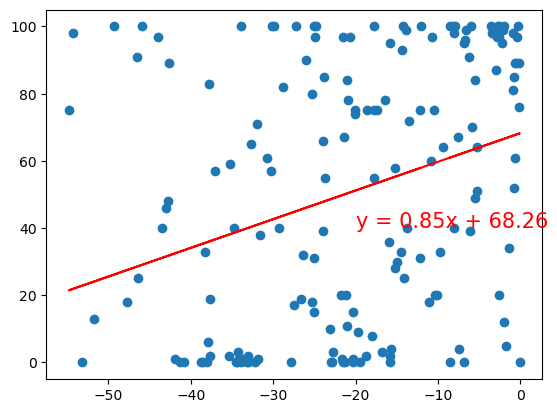

In [52]:
# Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -20, 40)
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between cloudiness and latitude in both Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023593070695207594


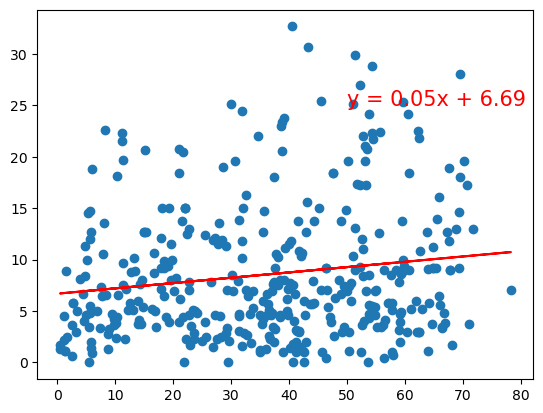

In [55]:
# Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 50, 25)
plt.show()

The r-value is: 0.0017311560150871407


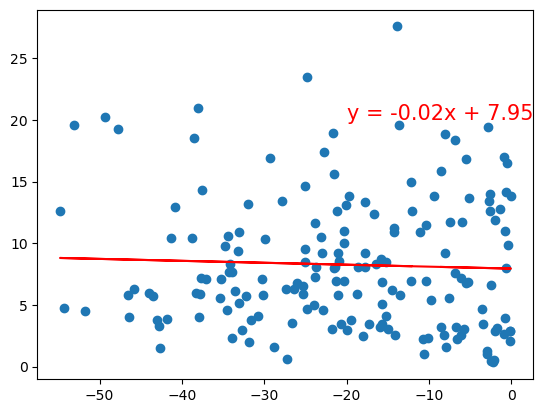

In [57]:
# Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -20, 20)
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between latitude and wind speed in both northern and southern hemispheres.